### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from numpy import newaxis
%matplotlib inline 

## Tranfer Function Options

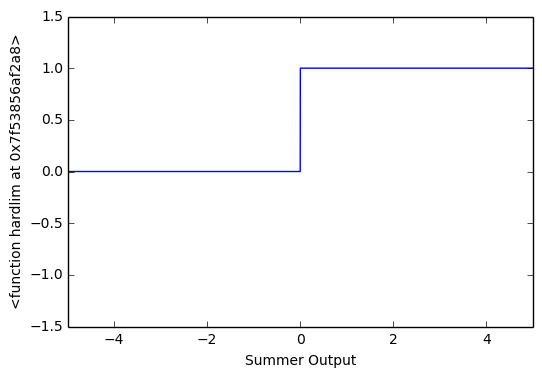

[-5.    -4.999 -4.998 ...,  4.997  4.998  4.999]
[0 0 0 ..., 1 1 1]


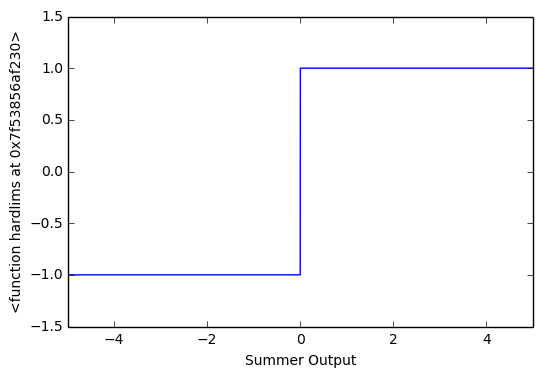

[-5.    -4.999 -4.998 ...,  4.997  4.998  4.999]
[-1 -1 -1 ...,  1  1  1]


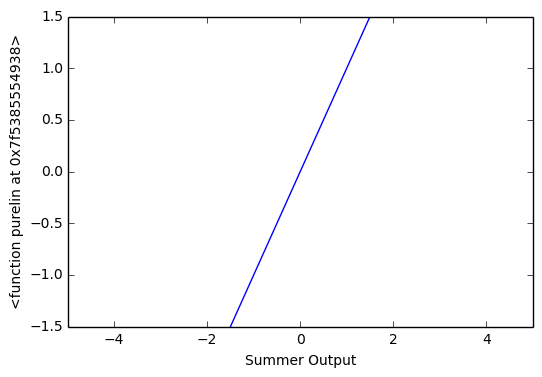

[-5.    -4.999 -4.998 ...,  4.997  4.998  4.999]
[-5.    -4.999 -4.998 ...,  4.997  4.998  4.999]


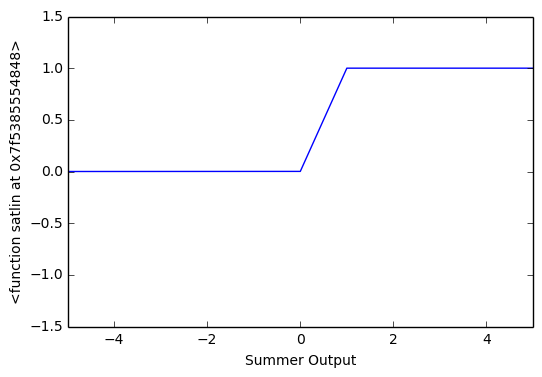

[-5.    -4.999 -4.998 ...,  4.997  4.998  4.999]
[ 0.  0.  0. ...,  1.  1.  1.]


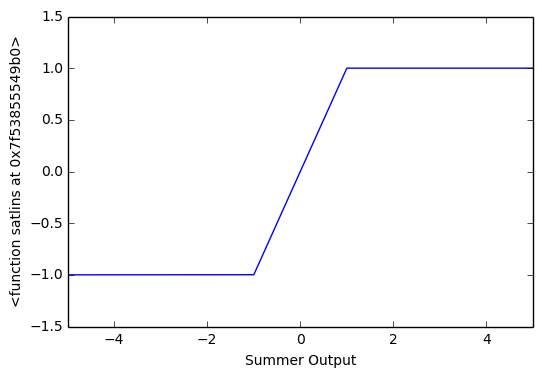

[-5.    -4.999 -4.998 ...,  4.997  4.998  4.999]
[-1. -1. -1. ...,  1.  1.  1.]


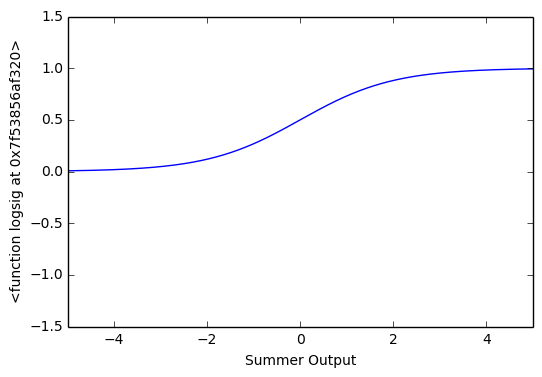

[-5.    -4.999 -4.998 ...,  4.997  4.998  4.999]
[ 0.00669285  0.0066995   0.00670616 ...,  0.99328718  0.99329384
  0.9933005 ]


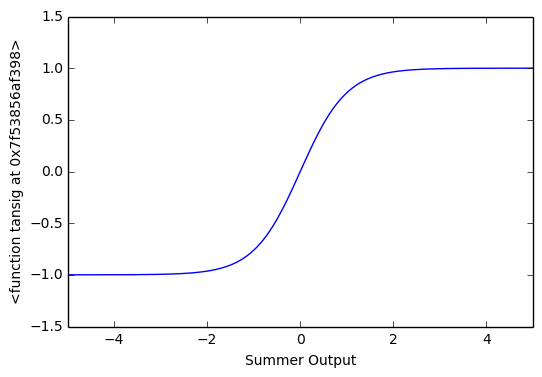

[-5.    -4.999 -4.998 ...,  4.997  4.998  4.999]
[-0.9999092  -0.99990902 -0.99990884 ...,  0.99990866  0.99990884
  0.99990902]


In [10]:
def hardlim(n):
    # w and p are vectors of length n and b is the bias
    # hardlim return 1 if sum w*p + b is greater than or equal to zero and returns 0 otherwise
    if n >= 0:
        return 1
    else:
        return 0

def hardlims(n):
    # w and p are vectors of length n and b is the bias
    # hardlim returns 1 if sum w*p + b is greater than or equal to zero and returns -1 otherwise
    if n >= 0:
        return 1
    else:
        return -1    

def purelin(n):
    # w and p are vectors of length n and b is the bias
    # purelin simply return the sum w*p + bias
    return n

def satlin(n):
    # w and p are vectors of length n and b is the bias
    # satlin returns 0 if sum w*p + b is less than zero, returns sum itself if sum is less than or equal to one
    # and 1 is sum is greater than 1
    a = n
    if a < 0:
        return 0
    elif a <= 1:
        return a
    else: 
        return 1
    
def satlins(n):
    # w and p are vectors of length n and b is the bias
    # satlin returns -1 if sum w*p + b is less than -1, returns sum itself if sum is less than or equal to one
    # and 1 is sum is greater than 1
    a = n
    if a < -1:
        return -1
    elif a <= 1:
        return a
    else: 
        return 1
    
def logsig(n):
    # w and p are vectors of length n and b is the bias
    # logsig returns 1/(1+e^-sum) where sum is w*p + b
    return 1.0/(1.0 + exp(-1.0*n))

def tansig(n):
    # w and p are vectors of length n and b is the bias
    # tansig returns (e^sum - e^-sum)/(e^sum + s^-sum) where sum is w*p + b
    return (exp(n) - exp(-n))/(exp(n) + exp(-n))

def test(func):
    n = -5
    x = []
    y = []
    precision = 1000
    for i in range(0, 10*precision):
        x.append(n + 1.0*i/precision)
        y.append(func(n + 1.0*i/precision))
    plt.xlim([-5, 5])
    plt.ylim([-1.5, 1.5])
    plt.xlabel('Summer Output')
    plt.ylabel(func)
    plt.plot(x, y)
    plt.show()
    print(np.array(x))
    print(np.array(y))

test(hardlim)
test(hardlims)
test(purelin)
test(satlin)
test(satlins)
test(logsig)
test(tansig)

### Single Neuron

In [3]:
def apply_on_1D(f, n):      # It is called 1D because it is used for 1D weight matrices.
    # f is function and n is neuron's summer output
    return f(n)

In [4]:
def getNeuronOuput(f, w, p, bias):
    # w and p are vectors of length n and b is the bias
    # summer returns w_1*p_1 + w_2*p_2 + ... + w_n*p_n + b
    n = w.dot(p) + bias
    return apply_on_1D(f, n[0])

f = tansig
w = np.array([0.5, 1, 1])
p = np.array([-1, -1, 1])[:, newaxis]
b = [1]

#print(getNeuronOuput(f, w, p, b))

## Theory of Layer of Neurons

### Variables:

#### Numbers: 

R: number of inputs to the layer i.e. number of inputs to each neuron

S: number of outputs of the layer i.e. number of neurons in the layer




#### Vectors: 

^p: the input vector, a Rx1 matrix

^W: the weight matrix, a SxR matrix

^b: the bias matrix, a Sx1 matrix

^n: the summer output matrix i.e. (^W)x(^p) + (^b), a Sx1 matrix

^f: the tranfer function matrix, a Sx1 matrix

^a: the output matrix i.e. (^f)(^n), a Sx1 matrix

#### Representation

A layer of neuron has a matrix output function which acts upon the summer output. 
Summer ouput is made by adding the product of weight and input matrix to the bias matrix.

# Single Layer of Neurons

In [5]:
def apply_on_2D(f, n):           # It is called 2D because it is used for 2D weight matrices.
    # f is an numpy array of functions and n is numpy array of neurons' outputs in layer.
    output = n.copy()
    S = len(f)
    for i in range(S):
        output[i] = f[i](n[i])
    return output

# print(apply_on_2D(np.array([logsig, tansig]), np.array([2.0, 0.3])))

In [6]:
def getLayerOutput(f, W, p, b):
    # S is the number of neurons in the layer, R is the number of inputs from previous layer. 
    # funcs or f is the function matrix (Sx1), W is the weight matrix (SxR), inputs or p is the input matrix,
    # biasses or b is the bias matrix.
    # getLayerOuput returns the result (matrix a) obtained by operating functions from funtions matrix 
    # on weights times inputs plus bias. 
    # a = f(n), n = W*p + b, return a. OR n[i] = f[i](W[i]*p + b[i])
    n = W.dot(p) + b
    return apply_on_2D(f.ravel(), n.ravel())
     
f = np.array([logsig, hardlim])[:, newaxis]
W = np.array([[1, 3, 4], [6, 2, 1]])
p = np.array([1, 2, 3])[:, newaxis]
b = np.array([1, 2])[:, newaxis]
print(getLayerOutput(f, W, p, b))

[0 1]


# Multiple Layers of Neurons

Let there be k layers. Number of inputs and number of neurons (or outputs) in each layer be (R_1, S_1), (R_2, S_2), ... , (R_k, S_k). Since, in a multiple layer neural network, for each layer input is the output from previous layer and output is the input to next layer, it must be true that:

R_1 = number of inputs to neural network. S_1 = R_2, S_2 = R_3, ... , S_(k-1) = R_k and S_(k) = number of outputs of neural network.

Also, let W_1, W_2, ... , W_(k) be the weights, b1, b_2, ... , b_(k) be the biasses of layer and f_1, f_2, ... , f_(k) be the functions.

So, to a network, we can pass the three dimensional matrix W with W_1, W_2, ... , W_(k) as its elements, a two dimensinal matrix b with b_1, b_2, ... , b_(k) as its elements, a two dimensional matrix f with f_1, f_2, ... , f_(k) as its elemnts and an input vector p.


In [7]:
def getMultipleLayerOutput(f, W, b, p):
    # Let k be the number of layers in neural network. f is a two dimensional matrix f with 
    # f_1, f_2, ... , f_(k) as its elements. W is the three dimensional vector with W_1, W_2, ... , W_(k) 
    # as its elements. b is a two dimensinal matrix with b_1, b_2, ... , b_(k) as its 
    # elements. p is the input vector. getMultipleLayerOutput takes
    # the input p as the input to network and layers of neurons operator consecutively on
    # it to get the output of the network. It returns THE FINAL OUTPUT OF ALL THE LAYERS.
    # a be the two dimensional matrix with a_1, a_2, ..., a_(k) as outputs of 
    # the layers of neural networks. a[0] = f[0](W[0]*p + b[0]) and a[i] = f[i](W[i]*a[i-1] + b[i]) for i > 0. 
    a = []
    a.append(getLayerOutput(np.array(f[0]), np.array(W[0]), np.array(p), np.array(b[0])))
    for i in range(1, len(W)):
        a.append(getLayerOutput(np.array(f[i]), np.array(W[i]), np.array(a[i-1]), np.array(b[i])))
    return a[-1]

f = np.array([[logsig]*4, 
              [tansig]*2, 
              [hardlim]*3])
W = np.array([[[1, 1, 1], 
              [1, 5, 2], 
              [-1, -2, 4], 
              [2, 1, 2]], 
             [[1, 10, 1, 1], 
              [-1, -2, -3, -2]], 
             [[2, -2], 
              [-1, 3], 
              [6, -3]]])
p = np.array([[1, -2, 3, -4], 
             [1, -1], 
             [1, -2, 0]])
b = np.array([1, 2, 3])

print(getMultipleLayerOutput(f, W, p, b))

[1 0 1]


# Notes

### Assignment by Reference

In [8]:
array1 = [1, 2, 3]
array2 = array1

array2[1] = 100

print(array1)
print(array2)

[1, 100, 3]
[1, 100, 3]


### Array of Same Functions

In [9]:
p = [hardlim]*4
print(p)

print([[logsig]*1]*5)

[<function hardlim at 0x7f53855546e0>, <function hardlim at 0x7f53855546e0>, <function hardlim at 0x7f53855546e0>, <function hardlim at 0x7f53855546e0>]
[[<function logsig at 0x7f5385554758>], [<function logsig at 0x7f5385554758>], [<function logsig at 0x7f5385554758>], [<function logsig at 0x7f5385554758>], [<function logsig at 0x7f5385554758>]]
